## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice in the DataFrame.
df["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupDF = df[df.duplicated(["Mouse ID", "Timepoint"])]
dupDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
g9_df = df.loc[df["Mouse ID"] == "g989"]
g9_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropdup_df = df[df["Mouse ID"] != "g989"]


In [7]:
# Checking the number of mice in the clean DataFrame.
dropdup_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumorvolume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.

drugSt_gb = dropdup_df.groupby(["Drug Regimen"])
drugmean = drugSt_gb.mean()["Tumor Volume (mm3)"]
drugmedian = drugSt_gb.median()["Tumor Volume (mm3)"]
drugvar = drugSt_gb.var()["Tumor Volume (mm3)"]
drugstd = drugSt_gb.std()["Tumor Volume (mm3)"]
drugsem = drugSt_gb.sem()["Tumor Volume (mm3)"]


In [9]:
#sumtable
sum_table = pd.DataFrame({
                         "Mean": drugmean,
                         "Median": drugmedian,
                          "Variance": drugvar,
                          "St Dev": drugstd,
                          "SEM": drugsem
                         })
sum_table.style.set_caption("Tumor Volume (mm3)")
sum_table.head(10)

,Mean,Median,Variance,St Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
sum_table2 = drugSt_gb.agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
sum_table2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar Plots

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
#Create DF
bardata = pd.DataFrame(drugSt_gb["Mouse ID"].count())
bardata = bardata.sort_values(by=["Mouse ID"], ascending = False)
bardata


,Mouse ID
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


(100, 250)

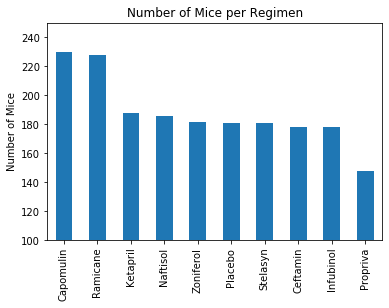

In [12]:
#Create barchart
ax = bardata.plot.bar(legend= False)
ax.set_xlabel("")
ax.set_ylabel("Number of Mice")
ax.set_title("Number of Mice per Regimen")
ax.set_ylim(100,250)

(100, 250)

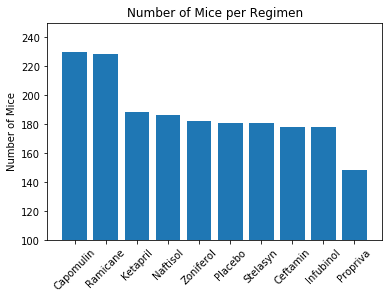

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
plt.bar(bardata.index, bardata["Mouse ID"])
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Regimen")
plt.xticks(rotation=45)
plt.ylim(100,250)


## Pie Plots

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Create DF
gender = pd.DataFrame(dropdup_df.groupby("Sex").count()["Mouse ID"])
gender

,Mouse ID
Sex,
Female,922
Male,958


Text(0.5, 1.0, 'Mice by Gender')

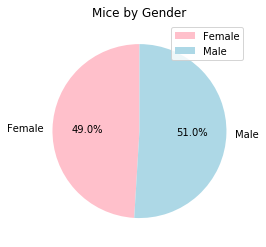

In [15]:
colors = ["pink", "lightblue"]
mousepie = gender.plot.pie(y= "Mouse ID", autopct='%1.1f%%', colors = colors, startangle = 90)
mousepie.set_ylabel("")
mousepie.set_title("Mice by Gender")


Text(0.5, 1.0, 'Mice by Gender')

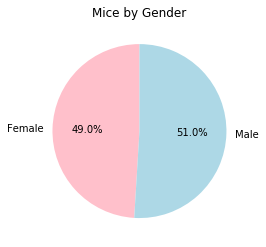

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender["Mouse ID"], labels=gender.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Mice by Gender")

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Create DF for max timepoint of each mouse
mouseTime = dropdup_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index(drop=False)
mouseTime



,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [18]:
# merge new df to drop other timepoints
merge_df = pd.merge (mouseTime, dropdup_df, how="inner", on = ["Mouse ID", "Timepoint"] )
finalvol = pd.DataFrame({"Drug Regimen": merge_df["Drug Regimen"], 
                         "Mouse ID": merge_df["Mouse ID"], 
                         "Tumor Volume (mm3)": merge_df["Tumor Volume (mm3)"]})



In [19]:
# Identify potentially best treatments
finalvol.groupby("Drug Regimen").describe()


Tumor Volume (mm3)                                              \
                          count       mean        std        min        25%   
Drug Regimen                                                                  
Capomulin                  25.0  36.667568   5.715188  23.343598  32.377357   
Ceftamin                   25.0  57.753977   8.365568  45.000000  48.722078   
Infubinol                  25.0  58.178246   8.602957  36.321346  54.048608   
Ketapril                   25.0  62.806191   9.945920  45.000000  56.720095   
Naftisol                   25.0  61.205757  10.297083  45.000000  52.079510   
Placebo                    25.0  60.508414   8.874672  45.000000  52.942902   
Propriva                   24.0  56.493884   8.415626  45.000000  49.119739   
Ramicane                   25.0  36.191390   5.671539  22.050126  31.560470   
Stelasyn                   24.0  61.001707   9.504293  45.000000  52.476596   
Zoniferol                  25.0  59.181258   8.767099  45.000000  49.988302   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     38.125164  40.159220  47.685963  
Ceftamin      59.851956  64.299830  68.923185  
Infubinol     60.165180  65.525743  72.226731  
Ketapril      64.487812  69.872251  78.567014  
Naftisol      63.283288  69.563621  76.668817  
Placebo       62.030594  68.134288  73.212939  
Propriva      55.591622  62.689368  72.455421  
Ramicane      36.561652  40.659006  45.220869  
Stelasyn      62.192350  69.103944  75.123690  
Zoniferol     61.840058  66.794156  73.324432

In [20]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
iqr=[]
med=[]

finaldrugs = ['Capomulin', 'Ramicane', 'Ceftamin', 'Infubinol']
for drug in finaldrugs:
    capvol = finalvol.loc[finalvol["Drug Regimen"] == f"{drug}"]["Tumor Volume (mm3)"]
    capquart = capvol.quantile([.25,.5,.75])
    iqr.append(capquart[.75]-capquart[.25])
    med.append(capquart[.5])

drugiqr = pd.DataFrame({"Drug Regimen": finaldrugs, "Median Volume": med, "IQR": iqr})
drugiqr["Lower Bound"] = drugiqr["Median Volume"]-(1.5*drugiqr["IQR"])
drugiqr["Upper Bound"] = drugiqr["Median Volume"]+(1.5*drugiqr["IQR"])
drugiqr

,Drug Regimen,Median Volume,IQR,Lower Bound,Upper Bound
0,Capomulin,38.125164,7.781863,26.452369,49.797960
1,Ramicane,36.561652,9.098537,22.913847,50.209457
2,Ceftamin,59.851956,15.577752,36.485327,83.218584
3,Infubinol,60.165180,11.477135,42.949478,77.380883


In [21]:
#Find outliers, creat lower bound, upper bound dataframes
#for i in range(len(drugiqr)):
#    print(drugiqr.iloc[i,0])
vol = finalvol.loc[(finalvol["Drug Regimen"] == "Capomulin")]
outliers = (vol.loc[(vol["Tumor Volume (mm3)"] < drugiqr.iloc[0,3]) |
                    (vol["Tumor Volume (mm3)"] > drugiqr.iloc[0,4])])

vol = finalvol.loc[(finalvol["Drug Regimen"] == "Ramicane")]
outliers = outliers.append(vol.loc[(vol["Tumor Volume (mm3)"] < drugiqr.iloc[1,3]) |
                                   (vol["Tumor Volume (mm3)"] > drugiqr.iloc[1,4])])

vol = finalvol.loc[(finalvol["Drug Regimen"] == "Ceftamin")]
outliers = outliers.append(vol.loc[(vol["Tumor Volume (mm3)"] < drugiqr.iloc[2,3]) |
                                   (vol["Tumor Volume (mm3)"] > drugiqr.iloc[2,4])])

vol = finalvol.loc[(finalvol["Drug Regimen"] == "Infubinol")]
outliers = outliers.append(vol.loc[(vol["Tumor Volume (mm3)"] < drugiqr.iloc[3,3]) |
                                   (vol["Tumor Volume (mm3)"] > drugiqr.iloc[3,4])])

outliers

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
174,Capomulin,s185,23.343598
96,Ramicane,k403,22.050126
31,Infubinol,c326,36.321346


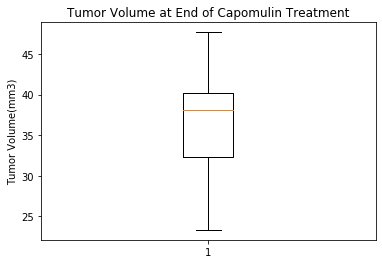

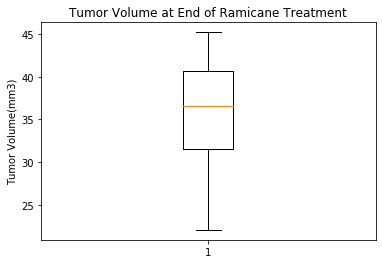

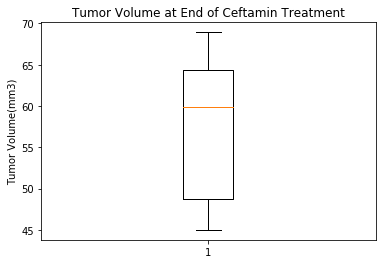

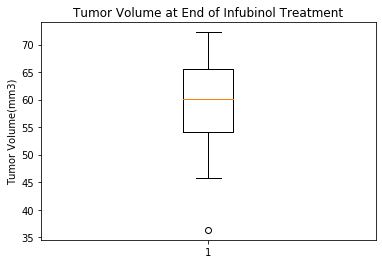

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
for drug in finaldrugs:
    plt.boxplot(finalvol.loc[(finalvol["Drug Regimen"] == f"{drug}")]["Tumor Volume (mm3)"])
    plt.ylabel("Tumor Volume(mm3)")
    plt.title(f"Tumor Volume at End of {drug} Treatment")
    plt.show()

## Line and Scatter Plots

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#find a mouse
capdata = dropdup_df.loc[dropdup_df["Drug Regimen"] == "Capomulin"]
capdata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


Text(0.5, 1.0, 'Tumor Volume for Mouse s185 After Capomulin Treatment')

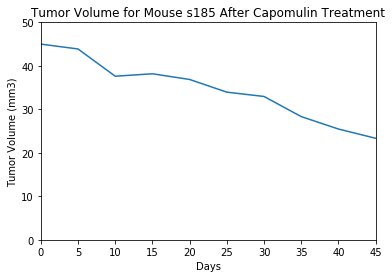

In [24]:
amouse = capdata.loc[capdata["Mouse ID"] == "s185"]
plt.plot(amouse["Timepoint"], amouse["Tumor Volume (mm3)"])
plt.ylim(0,50)
plt.xlim(0,45)
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume for Mouse s185 After Capomulin Treatment")

Text(0, 0.5, 'Tumor Volume (mm3)')

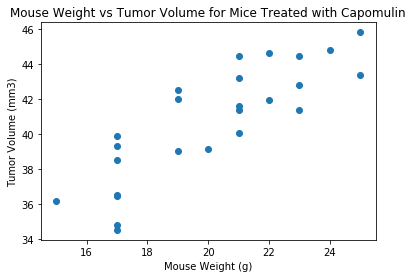

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capscat = capdata.groupby("Mouse ID").mean()
plt.scatter(capscat["Weight (g)"], capscat["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs Tumor Volume for Mice Treated with Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capscat["Weight (g)"], capscat["Tumor Volume (mm3)"])


In [27]:
#Calc linear regression
x_values = capscat["Weight (g)"]
y_values = capscat["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
linregress(x_values, y_values)

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

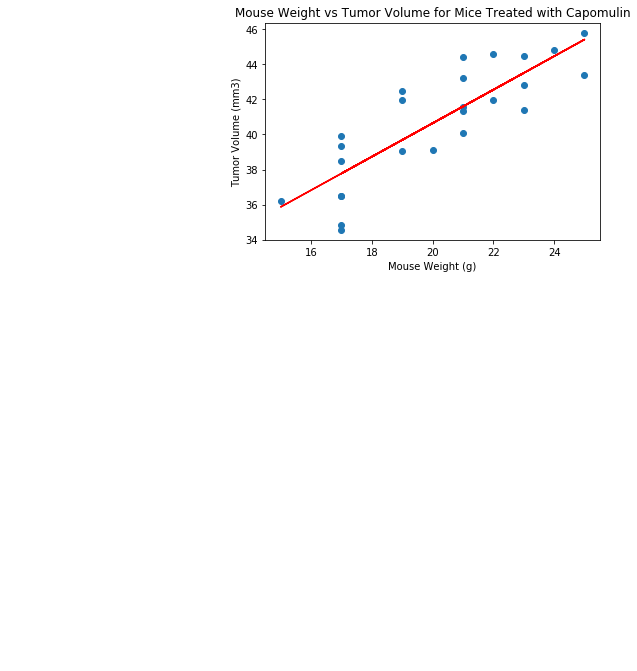

In [29]:
#Scatter plot w/ regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs Tumor Volume for Mice Treated with Capomulin")
plt.show()